# report_part3

# Introduction

Using reinforcement learning to train and teach software intelligent agents how to take actions in dynamic environments to maximize rewards and achieve the most optimal results is not an easy task. In this report, I will detail a comparative analysis done on the application of DQN, Q-Learning, and SARSA algorithms on the LunarLander-v2 environment from the Gymnasium library. Briefly, DQN is a neural network-based algorithm known for its strength in calculating accurate Q-values by using deep learning to approximate the optimal action-value function $Q(s, a)$, which makes it a strong choice for high-dimensional state spaces. On the other hand, Q-Learning is a model-free, off-policy algorithm that updates Q-values $Q(s, a)$ based on state-action pairs $(s, a)$ without requiring a representation of the environment’s transition function $T(s, a, s')$ and reward function $R(s, a)$, thereby making it a good choice for environments where the model is unknown. Lastly, SARSA is an on-policy algorithm that updates Q-values $Q(s, a)$ based on the action taken by the policy and the action that follows $a'$, hence making it a good choice in environments where the policy needs to be continuously update based on the most recent experiences and the environment model is unknown. Considering the different strengths of each algorithm, I conducted a comparative analysis of each based on the performance metrics which are average rewards, convergence rates, stability, and computation times. Results show that DQN had the best overall performance due to being able to utilize its deep neural networks for complex function approximation $Q(s, a)$ at the cost of higher computation time.

# Methodology 

The programmig language I used was python, and the environment used was the LunarLander-v2 environment. The three Reinforcement Algorithms implemented were DQN, Q-Learning, and SARSA. The DQN algorithm consisted of a neural network with two 64 unit hidden layers with ReLU activations, an input with size of the first layer as the state & an output layer with size of the last layer as the Q-values for each action; a learning rate of 0.0005, a gamma value of 0.99, and epsilon values that range from 0.01 to 1.0; and both the Q-learning & SARSA algorithm consisted of a learning rate of 0.1, gamma value of 0.99, and an epsilon value of 0.1. All of which was iterated over 2000 episodes.

# Results

The results below show that DQN resulted in the highest average reward of 70.68, the lowest convergence rate of 1415.0, the highest stability value of 26120.7, the highest computation time of 790.6 seconds, and a standard deviation of 161.6. Q-learning resulted in a negative average reward -93.2, a convergence rate of 2000.0, a stability value of 6879.8, a computation time of 48.6 seconds, and a standard deviation of 82.9. SARSA also resulted in a negative and lowest reward of -93.3, convergence rate of 2000.0, the lowest stability value of 6659.9, lowest computation time of 37.9, and a standard deviation of 81.6. The Q-Learning and SARSA negative rewards and fast computation time were expected, since both to not require a representation of the environment. It is then evident that DQN performed best due to its ability to model the complex lunar lander environment, at the cost of computation; and Q-learning and SARSA performed low but both require less computation time.

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'dqn_qlearning_sarsa/algorithmsmetrics_evalution.csv'
df = pd.read_csv(file_path)
df

,Algorithms,Average Reward,Convergence Rate,Stability,Computation Time
0,DQN,70.682274,1415.0,26120.669116,790.554379
1,Q_LEARNING,-93.201346,2000.0,6879.826812,48.553358
2,SARSA,-93.283900,2000.0,6659.848426,37.928237


dqn_std: 161.6
q_learning_std: 82.9
sarsa_std: 81.6


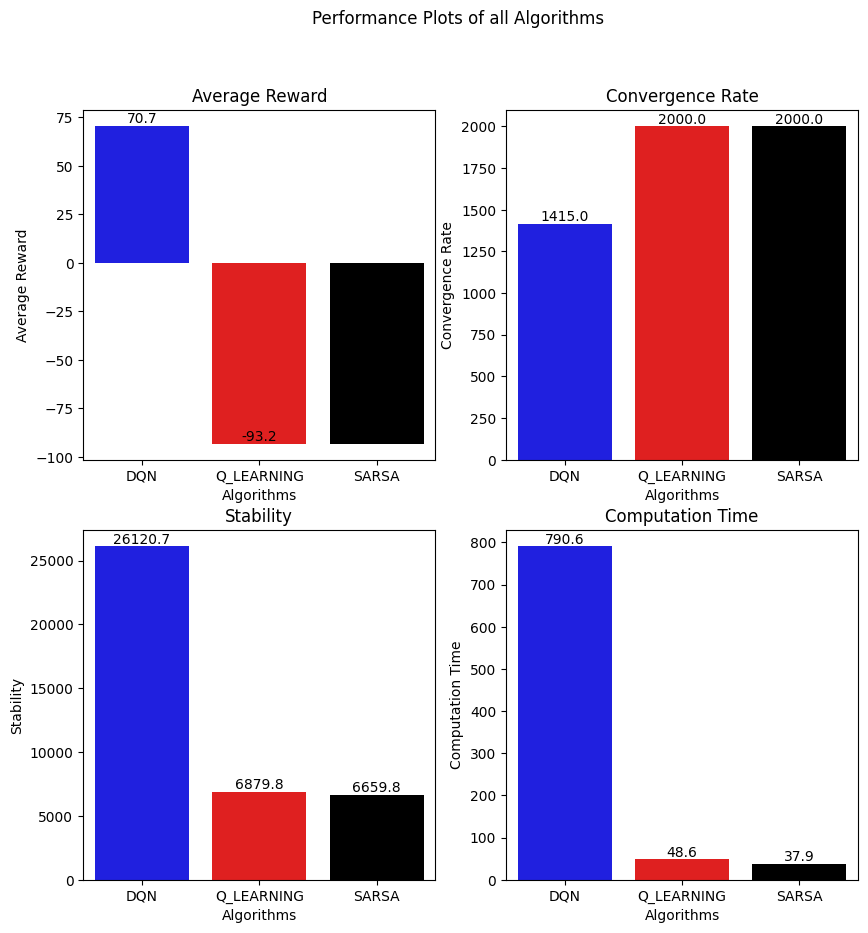

In [2]:
dqn_metrics = np.loadtxt('dqn_qlearning_sarsa/dqn_metrics.txt', delimiter = ',')
q_learning_metrics = np.loadtxt('dqn_qlearning_sarsa/q_learning_metrics.txt', delimiter = ',')
sarsa_metrics = np.loadtxt('dqn_qlearning_sarsa/sarsa_metrics.txt', delimiter = ',')

dqn_std = np.std(dqn_metrics)
q_learning_std = np.std(q_learning_metrics)
sarsa_std = np.std(sarsa_metrics)
print(f'dqn_std: {dqn_std:.1f}')
print(f'q_learning_std: {q_learning_std:.1f}')
print(f'sarsa_std: {sarsa_std:.1f}')

performance_metrics = ["Average Reward", "Convergence Rate", "Stability", "Computation Time"]
figure_container, plot_axes = plt.subplots(2, 2, figsize=(10, 10))
figure_container.suptitle('Performance Plots of all Algorithms')

for metric_index, metric_name in enumerate(performance_metrics):
    axis = plot_axes[metric_index // 2, metric_index % 2]
    sns.barplot(x = 'Algorithms', 
                y = metric_name, data = df, 
                ax = axis, palette = {'DQN':'blue', 'Q_LEARNING':'red', 'SARSA':'black'})
    axis.set_title(metric_name)
    for bar in axis.patches:
        height = bar.get_height()
        axis.text(x = bar.get_x() + bar.get_width() / 2, 
                  y = height, 
                  s = f'{height:.1f}', 
                  ha = 'center', 
                  va = 'bottom')
plt.show()

# Discussion
The strengths and weaknesses of each algorithm can be observed in the results. DQN's strength is in its use of neural networks, which makes it able to calculate more accurate Q-values and account for various state spaces. In turn, computation time is increased as a result of neural network calculations. Next, Q-Learning's strength is its reduced computation time, which is due to not requiring a model of the environment, and its weakness is its low average rewards and stability, due to its off-policy design requiring no measure of average rewards and extensive exploration. Third, and similar, SARSA strength is reduced computation time, but its weakness is low average rewards and stability due to its on-policy design, which limits exploration of the state space and also does not require average rewards.

From the plot below, we can see an interesting observation of the DQN model. It shows how given enough time the DQN model eventually reaches stability. It first, shows significant variability due to its complex calculations within the neural networks. Hence, this emphasizes the trade-off between performance and computation time in the DQN algorithm, as long as it is given enough time to reach optimal policy.

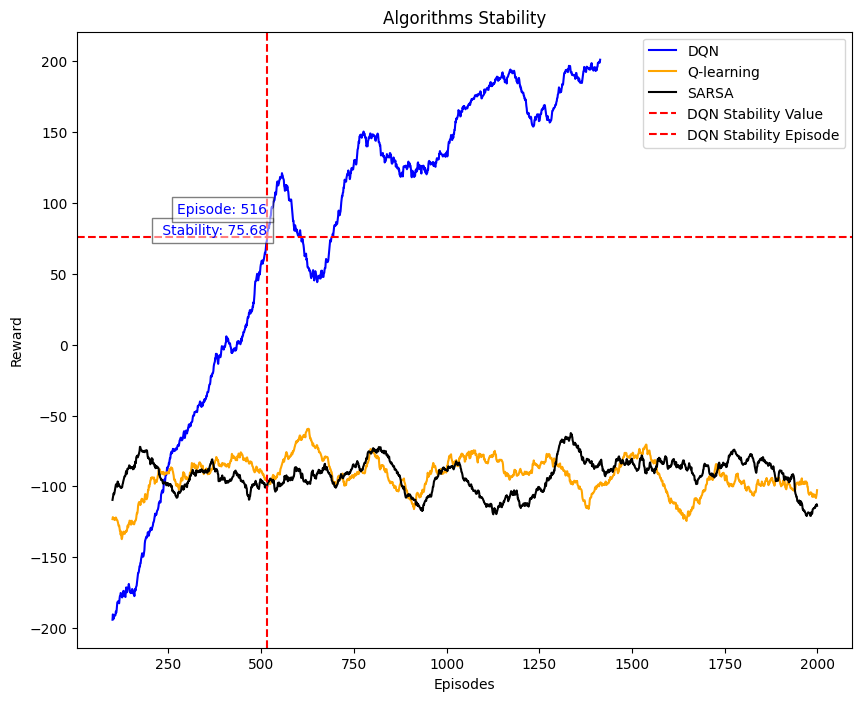

In [3]:
window_size = 100
dqn_mean = pd.Series(dqn_metrics).rolling(window = window_size).mean()
q_learning_mean = pd.Series(q_learning_metrics).rolling(window = window_size).mean()
sarsa_mean = pd.Series(sarsa_metrics).rolling(window = window_size).mean()
plt.figure(figsize = (10, 8))
plt.plot(dqn_mean, label = 'DQN', color = 'blue')
plt.plot(q_learning_mean, label = 'Q-learning', color = 'orange')
plt.plot(sarsa_mean, label = 'SARSA', color = 'black')

dqn_stability_value = dqn_mean.mean()
closest_idx = (dqn_mean - dqn_stability_value).abs().idxmin()
plt.axhline(y = dqn_stability_value, color = 'red', linestyle = '--', label = 'DQN Stability Value')
plt.axvline(x = closest_idx, color='red', linestyle = '--', label = 'DQN Stability Episode')
plt.text(closest_idx, dqn_stability_value, f' Stability: {dqn_stability_value:.2f}', color = 'blue', verticalalignment = 'bottom', horizontalalignment = 'right', bbox = dict(facecolor = 'white', alpha = 0.5))
plt.text(closest_idx, dqn_stability_value + 15, f'Episode: {closest_idx}', color='blue', verticalalignment = 'bottom', horizontalalignment = 'right', bbox = dict(facecolor='white', alpha = 0.5))
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Algorithms Stability')
plt.legend()
plt.show()

# Conclusion 

The findings of this analysis emphasize the trade-offs between environment complexity and algorithm design. DQN demonstrates the best performance in the LunarLander-v2 environment due to its use of a neural network to approximate the state-action values from the observed states and rewards. This allows DQN to handle the complex, high-dimensional state space of the LunarLander environment effectively, without requiring a model of the environment. Both model-free Q-learning and SARSA algorithms learn by interaction with the environment, but show lower computational use due to not requiring representation of the environment. Specifically, the off-policy Q-Learning algorithm is able to explore the state space more openly, but this leads to less stability and lower average rewards in the complex LunarLander environment because of the extensive exploration required. On the other hand, the on-policy SARSA algorithm limits exploration, which restricts its range of actions and outcomes in the complex LunarLander environment, and results in lower average rewards and stability. In summary, the best out of these three algorithms for the LunarLander-v2 environment is the DQN Reinforcement Algorithm because it is able to account for the various variables of the LunarLander-v2 environment, which requires high computation. Furthermore, the results from both Q-learning and SARSA demonstrate their use in more simple environments where an environments representation is available or its variables are few and can be easily approximated. Concluding that the choice of an algorithm should be carefully chosen based on the level of complexity of the chosen environment in terms of variables and methods of calculations for quantifying those variables, the goal of the environment, and the trade-offs of an algorithm based on the environment. In this case, the various factors involved in the LunarLander environment make DQN the best choice, and one can consider using various algorithms to account for the many variables of an even more complex environment.